In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

<Axes: xlabel='Exited', ylabel='count'>

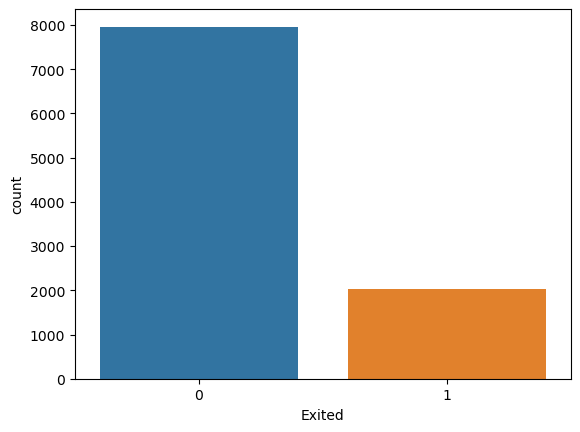

In [9]:
sns.countplot(x='Exited', data=df)

<Axes: xlabel='Geography', ylabel='count'>

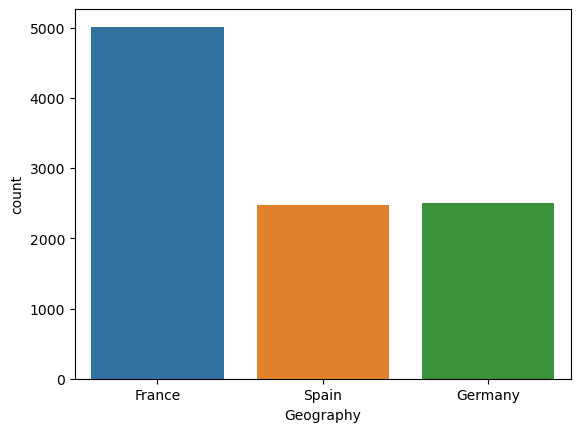

In [10]:
sns.countplot(x='Geography', data=df)

<Axes: xlabel='Gender', ylabel='count'>

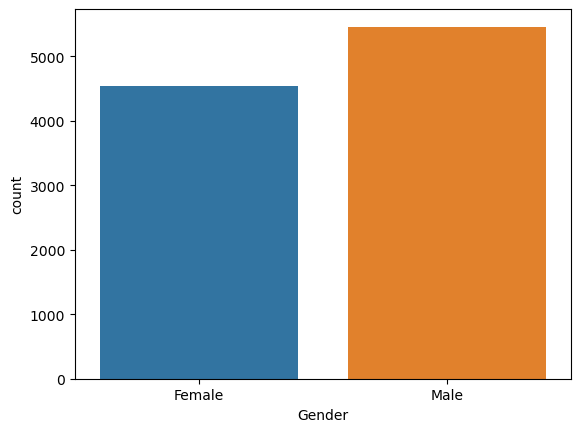

In [11]:
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Exited', ylabel='count'>

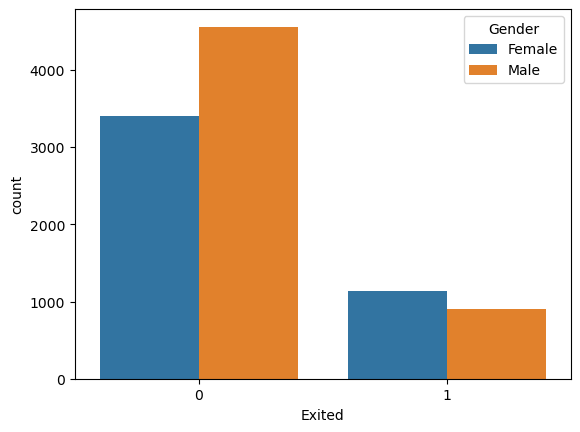

In [12]:
sns.countplot(x='Exited', hue='Gender', data=df)

<Axes: xlabel='Exited', ylabel='count'>

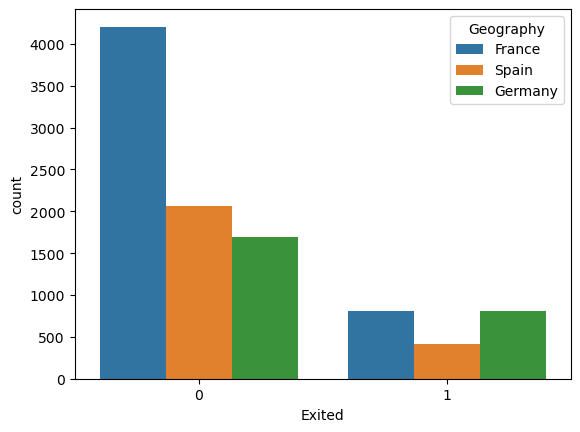

In [13]:
sns.countplot(x='Exited', hue='Geography', data=df)

In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [15]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:

from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder = LabelEncoder()
df['Geography']=label_encoder.fit_transform(df["Geography"])
df['Gender']=label_encoder.fit_transform(df["Gender"])

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Modelling


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop(['Exited'],axis=1)
Y=df['Exited']

In [31]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=42 )

In [32]:
X_train.shape

(8000, 10)

In [33]:
X_test.shape

(2000, 10)

In [34]:
X_train[:10]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,1,32,6,0.00,2,1,1,179093.26
1561,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,1,56,9,142147.32,1,0,0,39488.04
5933,569,0,1,41,4,120243.49,1,1,0,163150.03
8829,683,0,0,40,1,0.00,2,0,0,75762.00
7945,759,0,0,45,8,0.00,2,1,1,99251.24
3508,426,0,0,34,3,0.00,2,1,1,61230.83
2002,601,0,1,74,2,0.00,2,0,1,51554.58


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [36]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()

In [37]:
columns = ['LogisticRegression', 'RandomForestClassifier' , 'GradientBoostingClassifier']
accuracies=[]

In [38]:
def cal(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    
    accuracies.append(accuracy)
    
    print("--Model Evaluation on Test Data--")
    print(model)
    print()
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    print()
    print('Classification Report:\n',classification_report(y_test,y_pred))

--Model Evaluation on Test Data--
LogisticRegression()

Confusion Matrix:
 [[1573   34]
 [ 365   28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



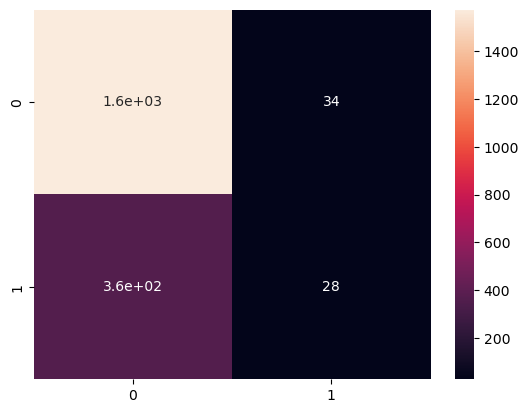

In [39]:
cal(model1)


--Model Evaluation on Test Data--
RandomForestClassifier()

Confusion Matrix:
 [[1554   53]
 [ 207  186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



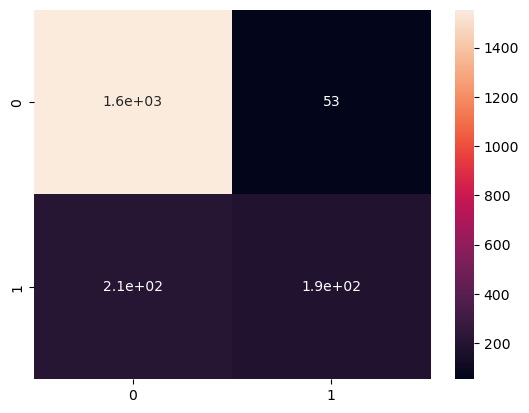

In [40]:
cal(model2)

--Model Evaluation on Test Data--
GradientBoostingClassifier()

Confusion Matrix:
 [[1547   60]
 [ 210  183]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



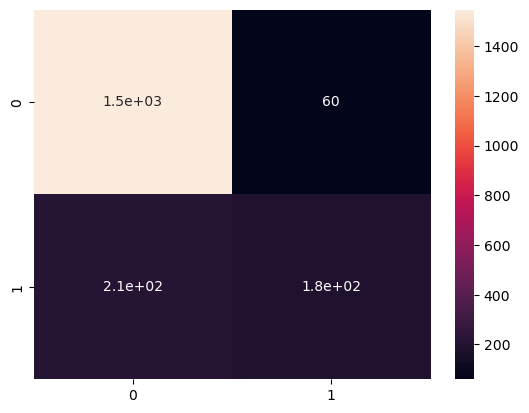

In [41]:
cal(model3)

In [42]:
accuracies

[0.8005, 0.87, 0.865]

In [43]:
FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracies})
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.8005
1,RandomForestClassifier,0.8700
2,GradientBoostingClassifier,0.8650


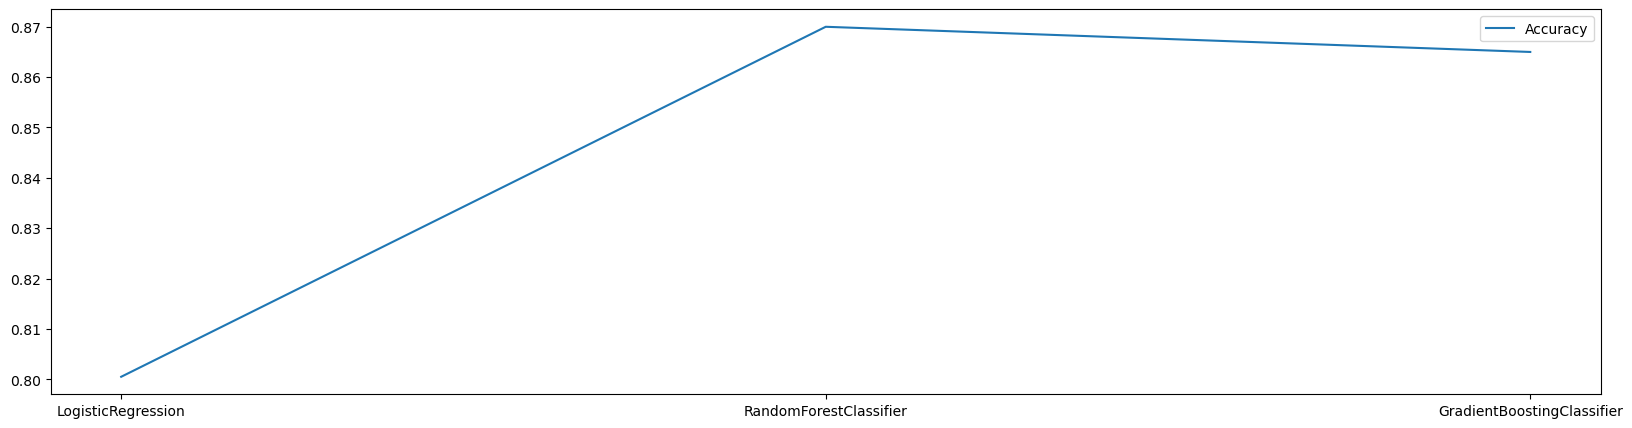

In [44]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,accuracies,label="Accuracy")
plt.legend()
plt.show()

In [45]:
# Gradient Boosting Model
y_pred = model3.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.865
